#Import Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Reading the data:

In [2]:
data = pd.read_csv('health care diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Perform descriptive analysis. Understand the variablesand their corresponding values. On the columns below, a value of zero does not make any sense and thus indicates missing values:
1) Glucose
2) BloodPressure
3) SkinThickness
4) Insulin
5)BMI


In [3]:
data.isnull().any()

data.info()

Positive = data[data['Outcome']==1]
Positive.head(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


#Visually explore these variables using histograms. Treat the missing values accordingly:

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

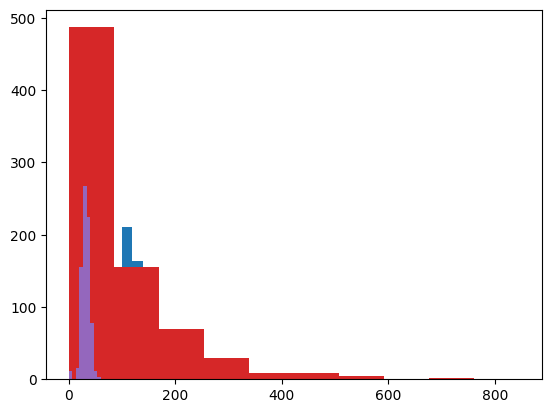

In [4]:
data['Glucose'].value_counts().head(7)

plt.hist(data['Glucose'])

data['BloodPressure'].value_counts().head(7)

plt.hist(data['BloodPressure'])

data['SkinThickness'].value_counts().head(7)

plt.hist(data['SkinThickness'])

data['Insulin'].value_counts().head(7)

plt.hist(data['Insulin'])

data['BMI'].value_counts().head(7)

plt.hist(data['BMI'])


#There are integer and float data type variables in this dataset. Create a Count (frequency) plot describing the data types and the count of variables:

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action:

0      138
130      6
180      4
175      3
156      3
185      2
194      2
Name: Insulin, dtype: int64

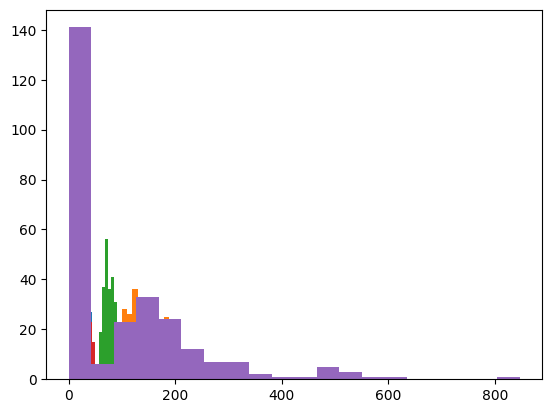

In [6]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20)

Positive['BMI'].value_counts().head(7)

plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20)

Positive['Glucose'].value_counts().head(7)

plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20)

Positive['BloodPressure'].value_counts().head(7)

plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20)

Positive['SkinThickness'].value_counts().head(7)

plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20)

Positive['Insulin'].value_counts().head(7)


#Create scatter charts between the pair of variables to understand the relationships. Describe your findings:

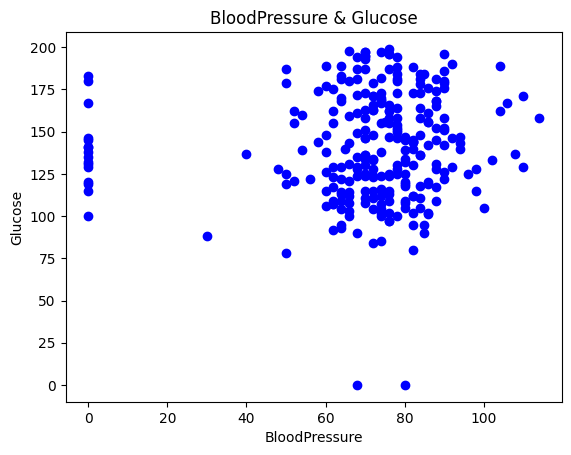

In [7]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

plt.scatter(BloodPressure, Glucose, color=['b'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()


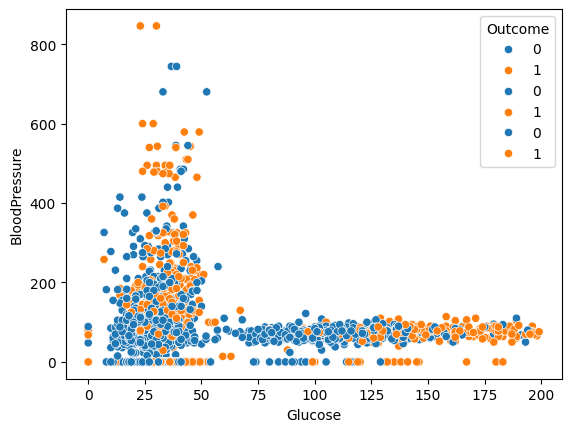

In [8]:
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=data);

B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=data);

S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=data);



#Perform correlation analysis. Visuallyexplore it using a heat map:

<Axes: >

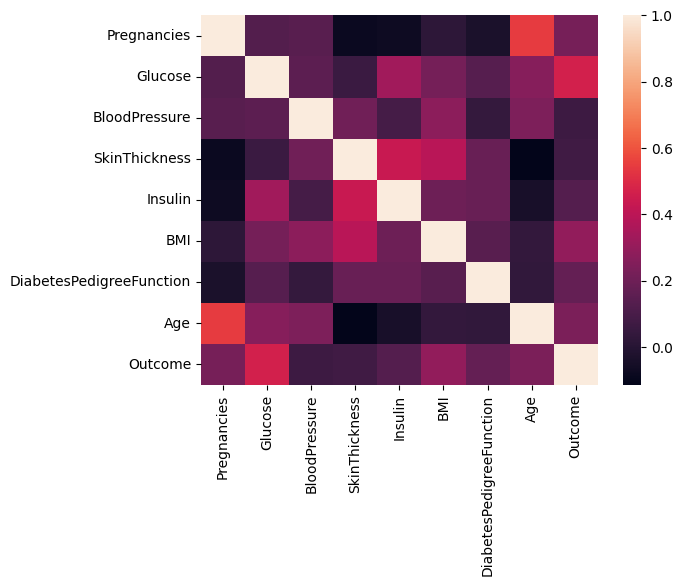

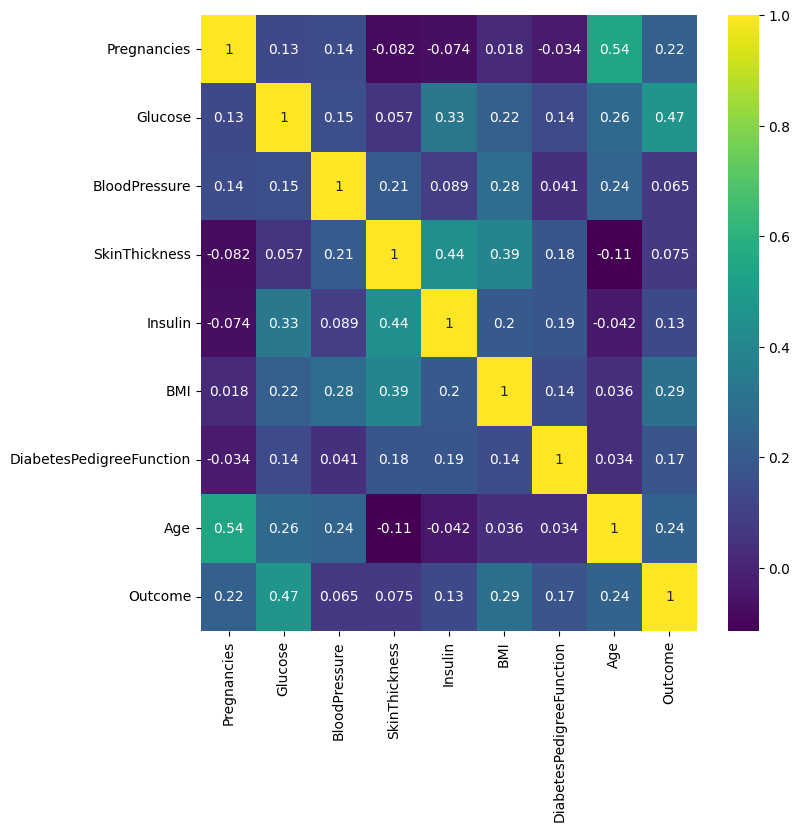

In [9]:
data.corr()

sns.heatmap(data.corr())

plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')



#Devise strategies for model building. It is important to decide the right validation framework. Express your thought process:

In [10]:
data.head(5)

features = data.iloc[:,[0,1,2,3,4,5,6,7]].values
label = data.iloc[:,8].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state =10)



#Apply an appropriate classification algorithm to build a model. Compare various models with the results of KNN:

In [11]:
#Logistic Regression:
model = LogisticRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,model.predict(features))
cm

from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))


0.7719869706840391
0.7662337662337663
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



In [12]:
#Decision Tree Classifier:
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train,y_train)

model3.score(X_train,y_train)
model3.score(X_test,y_test)


0.7727272727272727

In [13]:
#Random Forest:
model4 = RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)

model4.score(X_train,y_train)
model4.score(X_test,y_test)



0.7012987012987013

In [14]:
#Support Vector Classifier:
model5 = SVC(kernel='rbf',
           gamma='auto')

model5.fit(X_train,y_train)
model5.score(X_test,y_test)


0.6168831168831169

In [15]:
#KNN:
model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)

model2.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

#Create a classification report by analyzing sensitivity, specificity, AUC(ROC Curve), etc. Please be descriptive to explain what values of these parameter you have used:

AUC: 0.836
True Positive Rate - [0.         0.06716418 0.23880597 0.44776119 0.60074627 0.75373134
 0.88059701 0.98507463 1.        ], False Positive Rate - [0.    0.    0.02  0.056 0.12  0.248 0.428 0.668 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

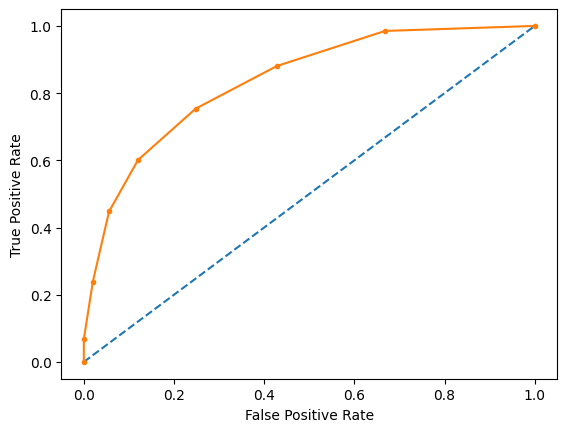

In [16]:
# predict probabilities:
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only:
probs = probs[:, 1]
# calculate AUC:
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve:
fpr, tpr, thresholds = roc_curve(label, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model:
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


f1=0.624 auc=0.726 ap=0.727


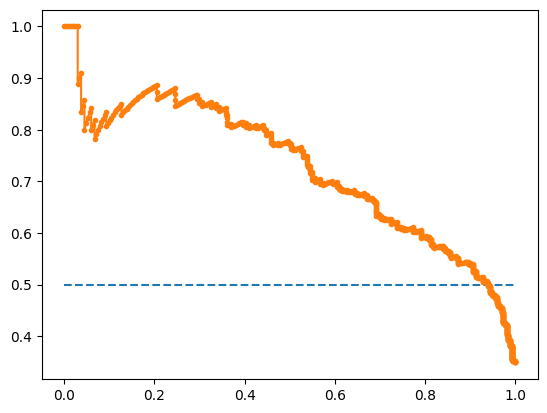

In [17]:
#Precision Recall Curve for Logistic Regression:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities:
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only:
probs = probs[:, 1]
# predict class values:
yhat = model.predict(features)
# calculate precision-recall curve:
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score:
f1 = f1_score(label, yhat)
# calculate precision-recall AUC:
auc = auc(recall, precision)
# calculate average precision score:
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model:
plt.plot(recall, precision, marker='.')


f1=0.658 auc=0.752 ap=0.709


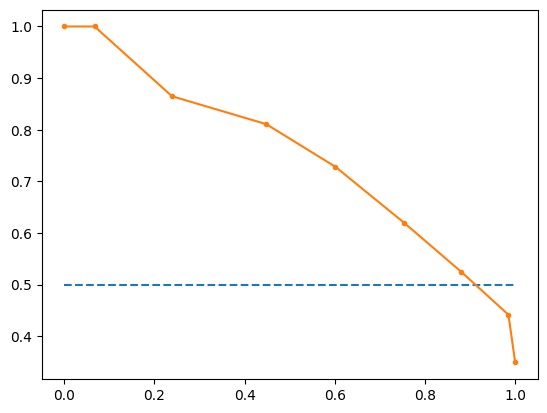

In [18]:
#Precision Recall Curve for KNN:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities:
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only:
probs = probs[:, 1]
# predict class values:
yhat = model2.predict(features)
# calculate precision-recall curve:
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score:
f1 = f1_score(label, yhat)
# calculate precision-recall AUC:
auc = auc(recall, precision)
# calculate average precision score:
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model:
plt.plot(recall, precision, marker='.')


f1=0.714 auc=0.815 ap=0.768


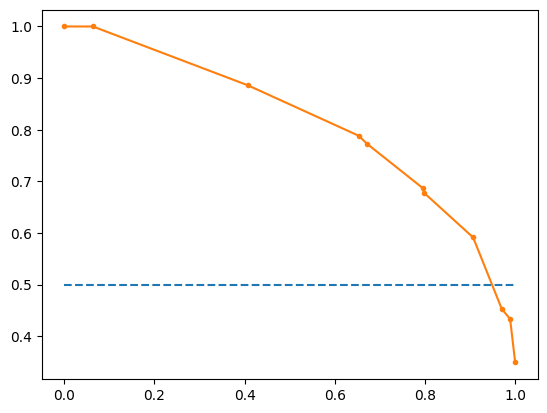

In [19]:
#Precision Recall Curve for Decission Tree Classifier:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities:
probs = model3.predict_proba(features)
# keep probabilities for the positive outcome only:
probs = probs[:, 1]
# predict class values:
yhat = model3.predict(features)
# calculate precision-recall curve:
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score:
f1 = f1_score(label, yhat)
# calculate precision-recall AUC:
auc = auc(recall, precision)
# calculate average precision score:
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model:
plt.plot(recall, precision, marker='.')


f1=0.901 auc=0.966 ap=0.959


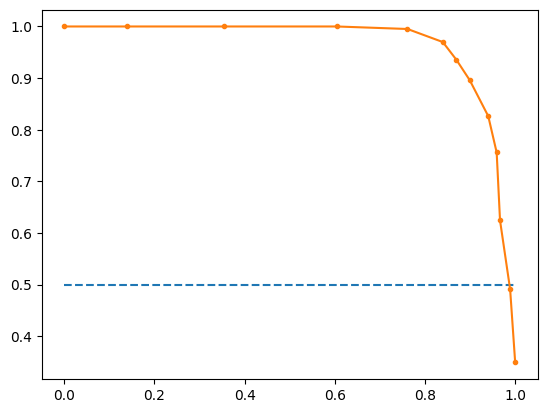

In [20]:
#Precision Recall Curve for Random Forest:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities:
probs = model4.predict_proba(features)
# keep probabilities for the positive outcome only:
probs = probs[:, 1]
# predict class values:
yhat = model4.predict(features)
# calculate precision-recall curve:
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score:
f1 = f1_score(label, yhat)
# calculate precision-recall AUC:
auc = auc(recall, precision)
# calculate average precision score:
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model:
plt.plot(recall, precision, marker='.')
